In [1]:
!pip install keras

In [2]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [3]:
!pip install scikeras

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras_tuner
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


## PREPROCESSING

In [5]:
df = pd.read_csv('speeddating.csv')

In [6]:
#Dropping irrelevant columns
dropCols = [col for col in df.columns if not col.startswith('d_')]
newDf = df.drop(columns = dropCols)

In [7]:
newDf

,d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,6.0,b'[4-6]',b'[2-5]',b'[2-5]',b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
1,1.0,b'[0-1]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
2,1.0,b'[0-1]',b'[2-5]',b'[2-5]',b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[0-4]'
3,2.0,b'[2-3]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
4,3.0,b'[2-3]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[16-20]',b'[0-15]',b'[0-15]',b'[16-20]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1.0,b'[0-1]',b'[0-1]',b'[0-1]',b'[0-15]',b'[0-15]',b'[21-100]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]'
8374,1.0,b'[0-1]',b'[0-1]',b'[0-1]',b'[21-100]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[0-4]'
8375,4.0,b'[4-6]',b'[0-1]',b'[0-1]',b'[21-100]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[-1-0]',b'[7-10]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
8376,3.0,b'[2-3]',b'[0-1]',b'[0-1]',b'[0-15]',b'[21-100]',b'[21-100]',b'[0-15]',b'[0-15]',b'[16-20]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]'


In [8]:
#Encoding columns to integer values (the average of the range)
for col in newDf:
  uniqueVals = newDf[col].unique()
  for uniqueVal in uniqueVals:
    if (isinstance(uniqueVal, str)):
      myStrs = re.findall('\d+', uniqueVal)
      myInts = np.array([int(myStr) for myStr in myStrs])
      avg = myInts.mean()
      newDf = newDf.replace(uniqueVal, avg)

In [9]:
newDf.columns

Index(['d_age', 'd_d_age', 'd_importance_same_race',
       'd_importance_same_religion', 'd_pref_o_attractive', 'd_pref_o_sincere',
       'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious',
       'd_pref_o_shared_interests', 'd_attractive_o', 'd_sinsere_o',
       'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o',
       'd_attractive_important', 'd_sincere_important',
       'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping',
       'd_yoga', 

In [10]:
#Encoded dataframe
newDf = newDf.dropna(axis=1)
newDf

,d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,6.0,5.0,3.5,3.5,60.5,18.0,18.0,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,5.5
1,1.0,0.5,3.5,3.5,60.5,7.5,7.5,60.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,2.0,1.5,4.0,7.0,5.5
2,1.0,0.5,3.5,3.5,18.0,18.0,18.0,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,2.0
3,2.0,2.5,3.5,3.5,60.5,7.5,7.5,60.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,2.0,1.5,4.0,7.0,5.5
4,3.0,2.5,3.5,3.5,60.5,7.5,18.0,7.5,7.5,18.0,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1.0,0.5,0.5,0.5,7.5,7.5,60.5,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,5.5
8374,1.0,0.5,0.5,0.5,60.5,18.0,7.5,7.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,2.0
8375,4.0,5.0,0.5,0.5,60.5,7.5,60.5,7.5,7.5,7.5,...,9.5,9.5,7.0,2.5,0.500000,8.5,1.5,4.0,7.0,5.5
8376,3.0,2.5,0.5,0.5,7.5,60.5,60.5,7.5,7.5,18.0,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,5.5


In [11]:
y = df['match']
print(y)

0       b'0'
1       b'0'
2       b'1'
3       b'1'
4       b'1'
        ... 
8373    b'0'
8374    b'0'
8375    b'0'
8376    b'0'
8377    b'0'
Name: match, Length: 8378, dtype: object


In [12]:
X = newDf
y = df['match']
y = y.to_numpy()

In [13]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [14]:
#Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

## MODEL BUILDING

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import expon, reciprocal

# Define the parameter space that will be searched over.
param_list = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.0001, 'scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create an SVC model instance
svc = SVC()


In [16]:
random_search = RandomizedSearchCV(svc, param_list, n_iter=7, cv=3, verbose=1, random_state=0, n_jobs=-1)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# After the search, you can access the best parameters and the best model
print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best parameters found:  {'kernel': 'poly', 'gamma': 0.0001, 'C': 10}


In [24]:
# After the search, access the best parameters and the best model
print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_

# Save the best model
from joblib import dump

dump(best_model, 'best_svm_model.joblib')
print("Model saved as 'best_svm_model_grid_search.joblib'.")


Best parameters found:  {'kernel': 'poly', 'gamma': 0.0001, 'C': 10}
Model saved as 'best_svm_model_grid_search.joblib'.


In [25]:
# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Evaluate training accuracy
y_pred_train = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy}")

Test Accuracy: 0.8412887828162291
Train Accuracy: 0.8412887828162291



Classification Report:
               precision    recall  f1-score   support

        b'0'       0.87      0.96      0.91      1407
        b'1'       0.51      0.23      0.31       269

    accuracy                           0.84      1676
   macro avg       0.69      0.59      0.61      1676
weighted avg       0.81      0.84      0.81      1676



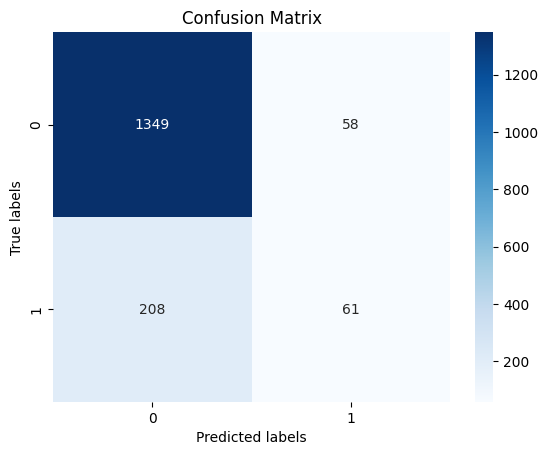

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()